desempenho brasil matematica e ciencias caiu

https://g1.globo.com/educacao/noticia/2019/12/03/brasil-cai-em-ranking-mundial-de-educacao-em-matematica-e-ciencias-e-fica-estagnado-em-leitura.ghtml

In [1]:
import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [2]:
estado = "sp"
uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
arquivo = f'{estado}.csv.zip'
!wget -O $arquivo $uri

--2020-10-26 01:02:39--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/sp.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip [following]
--2020-10-26 01:02:39--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip [following]
--2020-10-26 01:02:39--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

In [33]:
dados = pd.read_csv(arquivo, sep=';')

In [34]:
dados.columns = dados.columns.str.replace(' ', '')
dados["Q025"] = dados["Q025"].str.strip()
dados.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,12426,190001017053,2019,3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,EEACECDBADBEABAAEAEACAAAECBEEEBACACCDEDACADCB,ADBBE99999DEDDBCAAAEEDDDBAADCCACECDCAEBCBCEBBA...,EDBADBDBAECBBB*CBADBAECCBACECDEDECBACCECDCCAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,200.0,180.0,200.0,200.0,940.0,H,E,C,B,7,C,A,B,C,A,A,B,A,B,A,A,A,A,C,A,A,D,A,B,B
1,14849,190001019476,2019,3538204,Pinhalzinho,35,SP,19,M,1,3,1,1503804.0,Jacundá,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,B,B,4,C,A,B,D,A,B,B,A,A,A,A,A,A,B,A,A,C,A,B,A
2,15223,190001019850,2019,3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,BCDCABABABBCBAEEEBCACACAEDBCCAEBEABEADBAEACCB,BDABE99999BCBDADDBDCDAAECDEECDBCBCCDEDAACDEDBB...,DBEBAECBADCACECADBBBBCEBADCEABECAADDBEDDBAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,120.0,200.0,200.0,200.0,880.0,E,E,F,B,6,D,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,A,A
3,20246,190001024874,2019,3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,AC.BECDABAECBCBBEAACA.EDCDEAEAADCEABDAAACEBCC,99999CBEAEBBCEDBABEBDAADCEAEDEBBEACACACACDCEDB...,ADDCEEEDADABDBDAAACAECEBBABEBDBEEBADCEBDEDCDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B,B,B,B,4,C,A,C,D,B,B,B,A,B,B,B,A,B,B,B,A,B,B,A,B
4,20303,190001024931,2019,3549409,São Joaquim da Barra,35,SP,37,M,2,1,1,3549409.0,São Joaquim da Barra,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,3,C,A,B,C,A,B,B,A,A,A,B,A,A,A,A,A,C,B,B,B


In [35]:
dados.columns

Index(['ID', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=137)

In [36]:
dados["NU_INSCRICAO"].count()

813772

In [37]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    813772
Name: SG_UF_RESIDENCIA, dtype: int64

In [38]:
provas = ["NU_NOTA_CN","NU_NOTA_MT"]
qse = ["Q001", "Q002", "Q003", "Q004", "Q005", "Q006", "Q009", "Q019", "Q021", "Q022", "Q024", "Q025"]

# filtros:
# * obter apenas participantes que tiveram nota maior q zero nas duas provas (quero avaliar desempenho)
# * obter somente participantes que nao sao treineiros
# * somente ensino regular
dados_provas_qse = dados.query("IN_TREINEIRO == 0 & TP_ENSINO == 1")[provas + qse].dropna().query("NU_NOTA_CN > 0 & NU_NOTA_MT > 0")

dados_provas_qse

,NU_NOTA_CN,NU_NOTA_MT,Q001,Q002,Q003,Q004,Q005,Q006,Q009,Q019,Q021,Q022,Q024,Q025
0,564.6,600.2,H,E,C,B,7,C,C,C,A,D,B,B
2,576.2,731.8,E,E,F,B,6,D,C,A,A,C,A,A
3,402.2,393.2,B,B,B,B,4,C,D,B,A,B,A,B
5,399.6,419.2,D,G,A,D,4,G,C,C,A,D,B,B
10,449.5,612.8,D,E,C,B,3,C,C,B,A,C,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813766,417.8,479.1,E,D,B,B,5,D,C,B,A,C,B,B
813767,367.4,432.0,B,D,B,B,5,F,C,C,B,E,B,B
813768,398.6,487.3,H,E,F,B,2,C,C,B,B,C,A,B
813769,402.8,401.1,D,E,C,B,3,C,C,B,A,C,A,A


In [39]:
categories = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J' : 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19}
cat_cols = ["Q001", "Q002", "Q003", "Q004", "Q006", "Q009", "Q019", "Q021", "Q022", "Q024", "Q025"]
dados_provas_qse_num = dados_provas_qse.copy()
dados_provas_qse_num[cat_cols] = dados_provas_qse_num[cat_cols].applymap(categories.get)

#dados_provas_qse = dados_provas_qse_num

In [40]:
dados_provas_qse_num.head()

,NU_NOTA_CN,NU_NOTA_MT,Q001,Q002,Q003,Q004,Q005,Q006,Q009,Q019,Q021,Q022,Q024,Q025
0,564.6,600.2,8,4,2,1,7,2,2,2,0,3,1,1
2,576.2,731.8,4,4,6,1,6,3,2,0,0,2,0,0
3,402.2,393.2,1,1,1,1,4,2,3,1,0,1,0,1
5,399.6,419.2,3,7,0,3,4,7,2,2,0,3,1,1
10,449.5,612.8,3,4,2,1,3,2,2,1,0,2,0,0


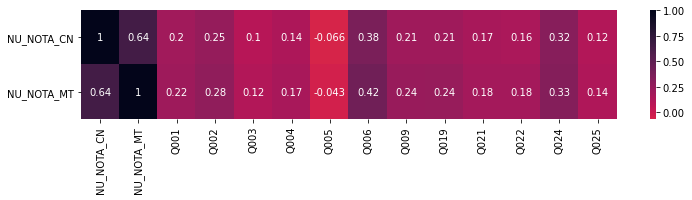

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,2))

correlacao = dados_provas_qse_num.corr()
ax = sns.heatmap(correlacao[:2], cmap="rocket_r", center=0, annot=True)

In [42]:
dados_provas_qse_num.describe()

,NU_NOTA_CN,NU_NOTA_MT,Q001,Q002,Q003,Q004,Q005,Q006,Q009,Q019,Q021,Q022,Q024,Q025
count,327965.000000,327965.000000,327965.000000,327965.000000,327965.000000,327965.000000,327965.000000,327965.000000,327965.000000,327965.000000,327965.000000,327965.000000,327965.000000,327965.000000
mean,488.320594,540.954719,3.813953,3.895861,2.474682,2.149748,3.852298,5.067934,2.231714,1.552217,0.350214,2.762069,0.917692,0.902755
std,73.884975,107.960294,2.069067,1.801383,1.607399,1.601657,1.270942,3.919635,0.757269,0.864196,0.477038,1.021369,0.816245,0.296292
min,327.900000,359.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,430.100000,452.200000,2.000000,3.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000,1.000000
50%,486.000000,527.000000,4.000000,4.000000,2.000000,1.000000,4.000000,4.000000,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000
75%,543.600000,619.000000,4.000000,4.000000,3.000000,3.000000,4.000000,7.000000,3.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,853.500000,985.000000,8.000000,8.000000,6.000000,6.000000,20.000000,17.000000,4.000000,4.000000,1.000000,4.000000,4.000000,1.000000


In [43]:
dados_provas_qse = dados_provas_qse_num

In [44]:
def explore_nota_qse(nota, questao_qse, hist_pallete="rocket_r"):
  fig, ax =plt.subplots(1,2, figsize=(24,8))
  sns.histplot(dados_provas_qse, x = nota, hue=questao_qse, kde=False, bins=10, ax=ax[0], palette=hist_pallete, multiple="stack")
  ax = sns.boxplot(data = dados_provas_qse, x = questao_qse, y = nota, ax=ax[1])
  fig.show()

## Q025: Na sua residência tem acesso à Internet?

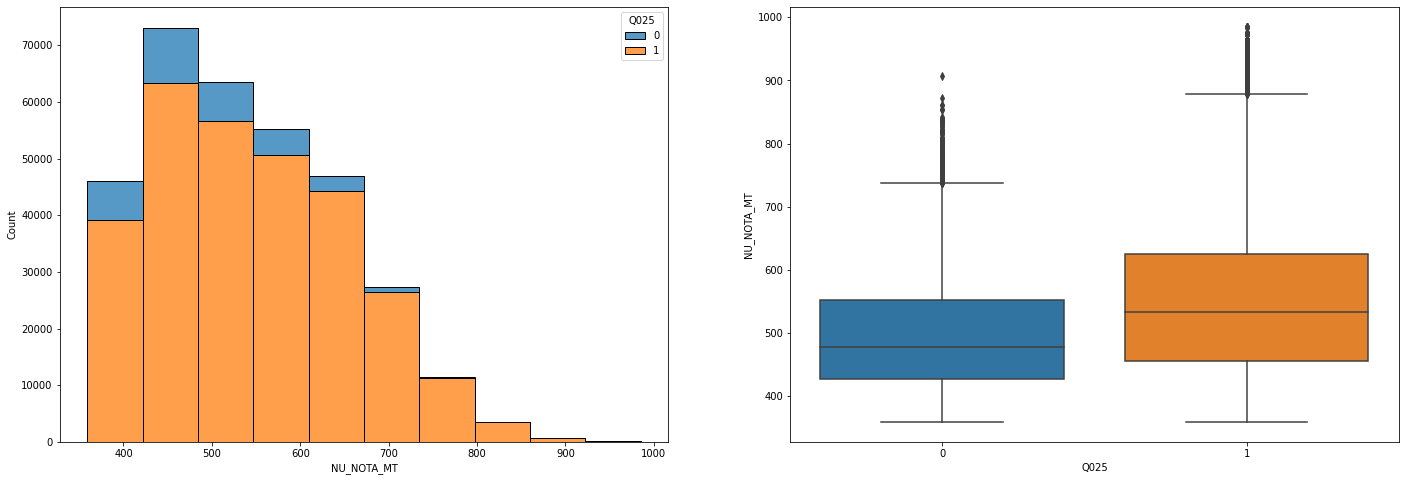

In [45]:
explore_nota_qse("NU_NOTA_MT", "Q025", "tab10")

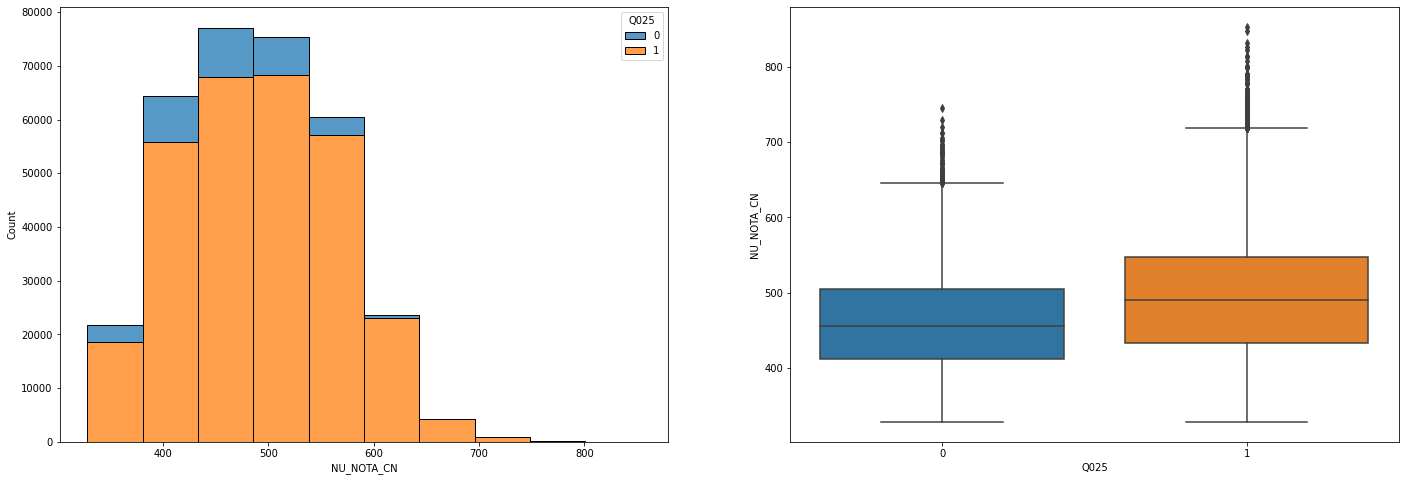

In [46]:
explore_nota_qse("NU_NOTA_CN", "Q025", "tab10")

## Q022: Na sua residência tem telefone celular?

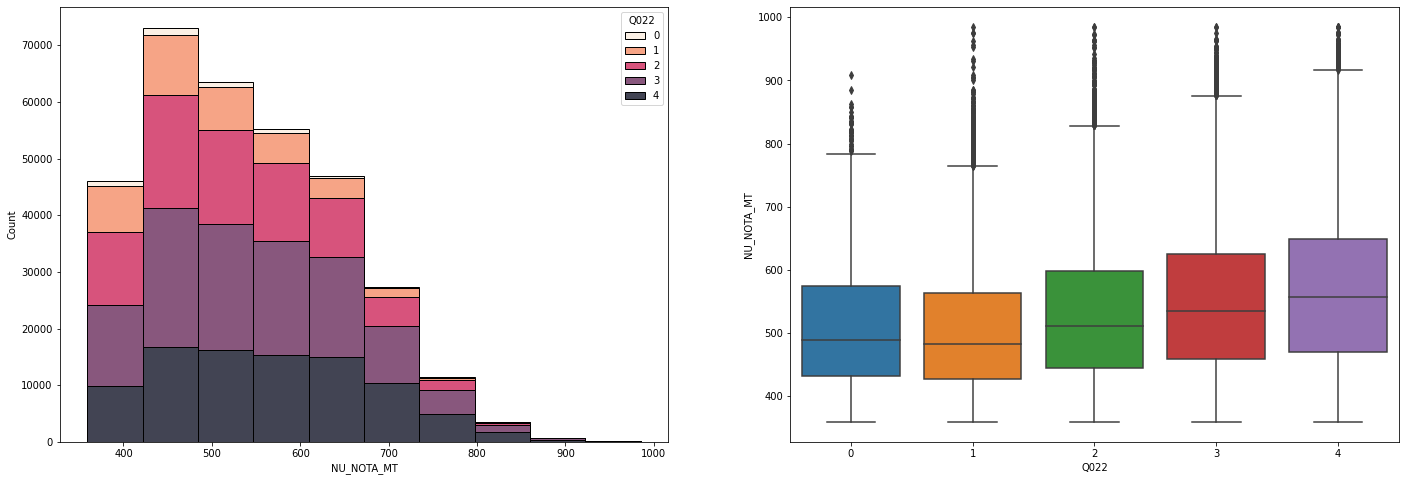

In [47]:
explore_nota_qse("NU_NOTA_MT", "Q022")

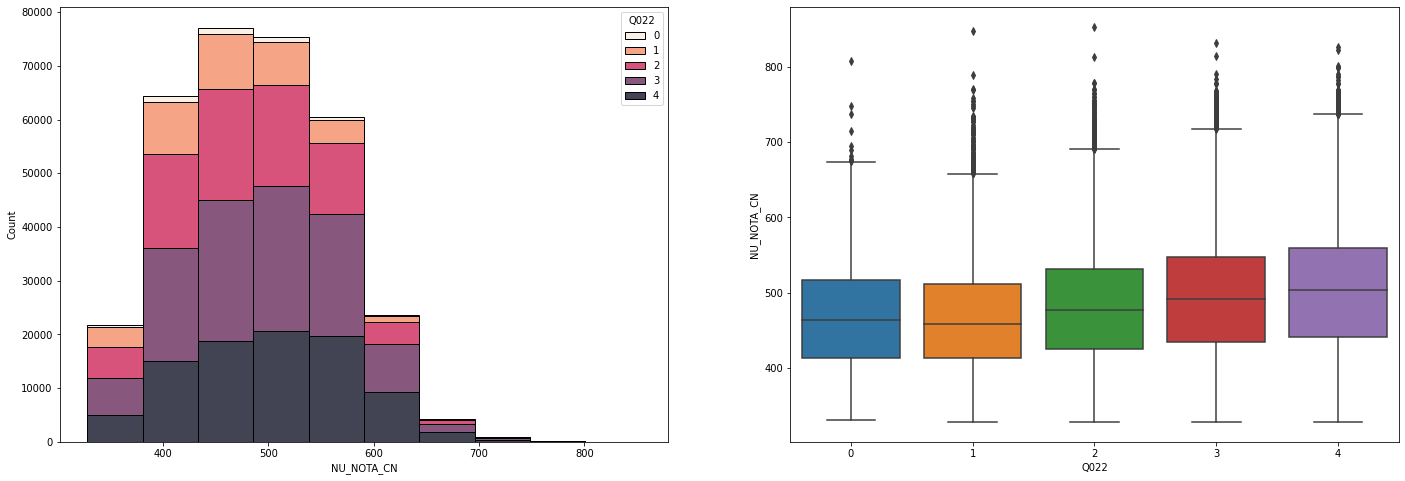

In [48]:
explore_nota_qse("NU_NOTA_CN", "Q022")

# Q024: Na sua residência tem computador?



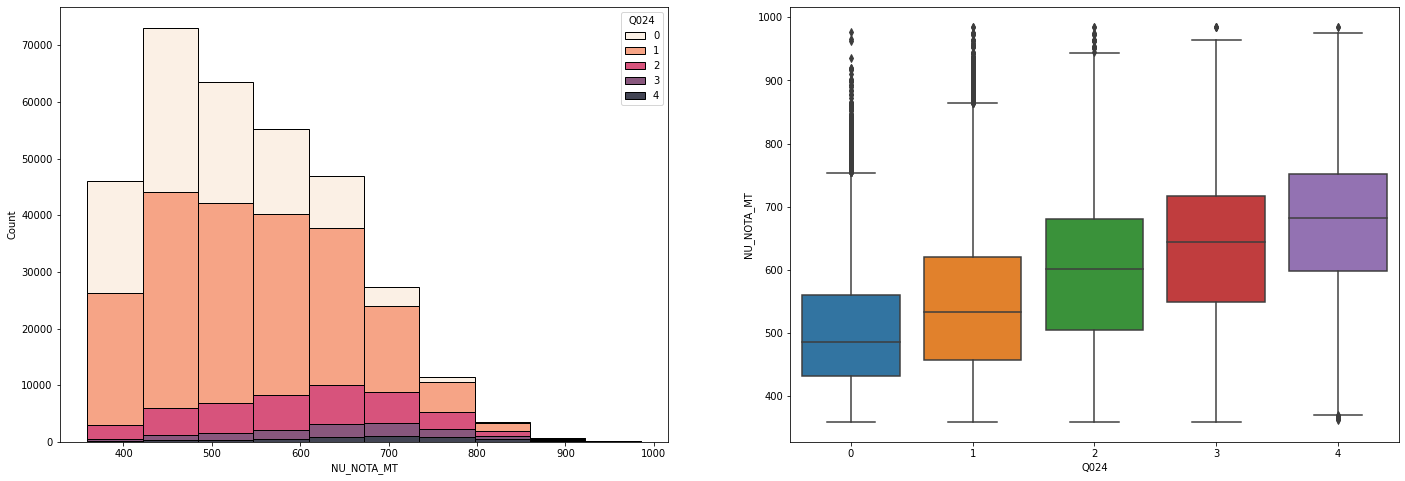

In [49]:
explore_nota_qse("NU_NOTA_MT", "Q024")

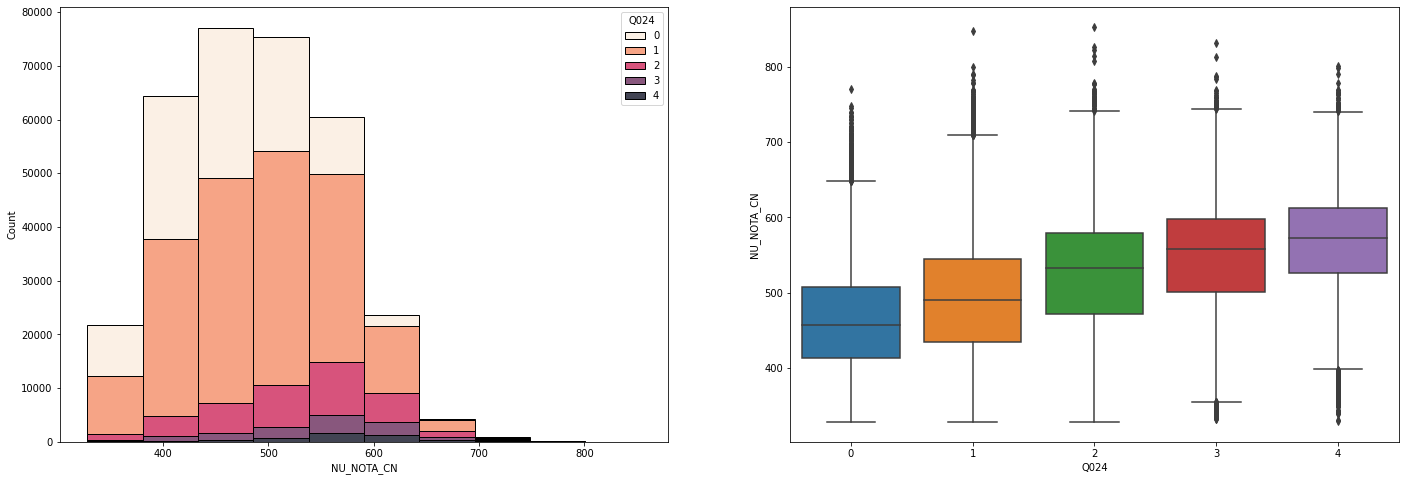

In [50]:
explore_nota_qse("NU_NOTA_CN", "Q024")

# Q001: Até que série seu pai, ou o homem responsável por você, estudou?

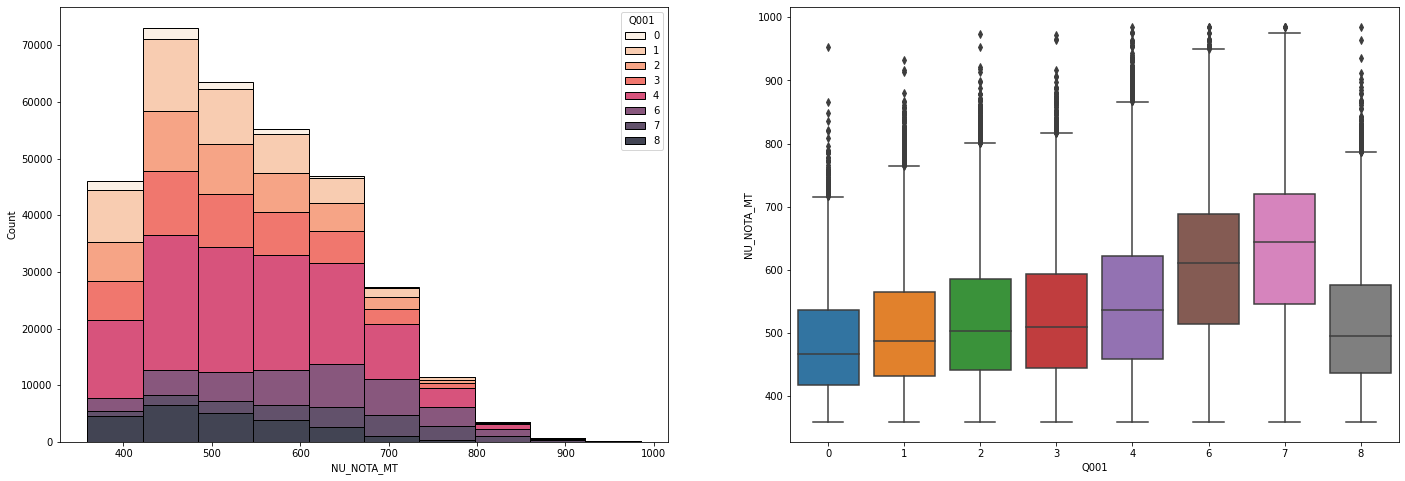

In [51]:
explore_nota_qse("NU_NOTA_MT", "Q001")

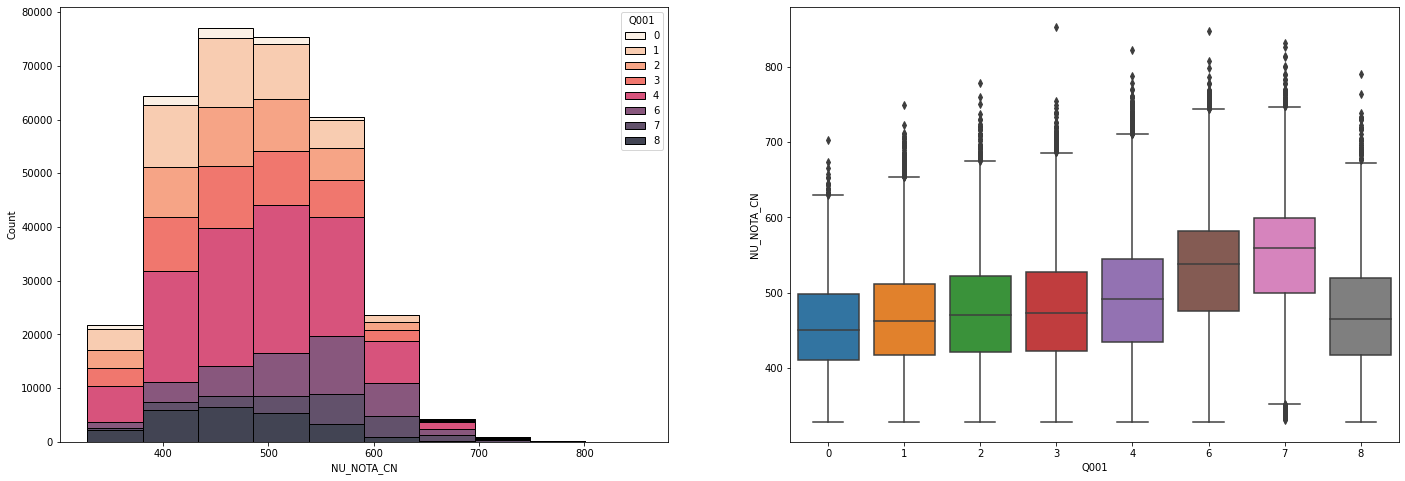

In [52]:
explore_nota_qse("NU_NOTA_CN", "Q001")

# Q002:Até que série sua mãe, ou a mulher responsável por você, estudou?

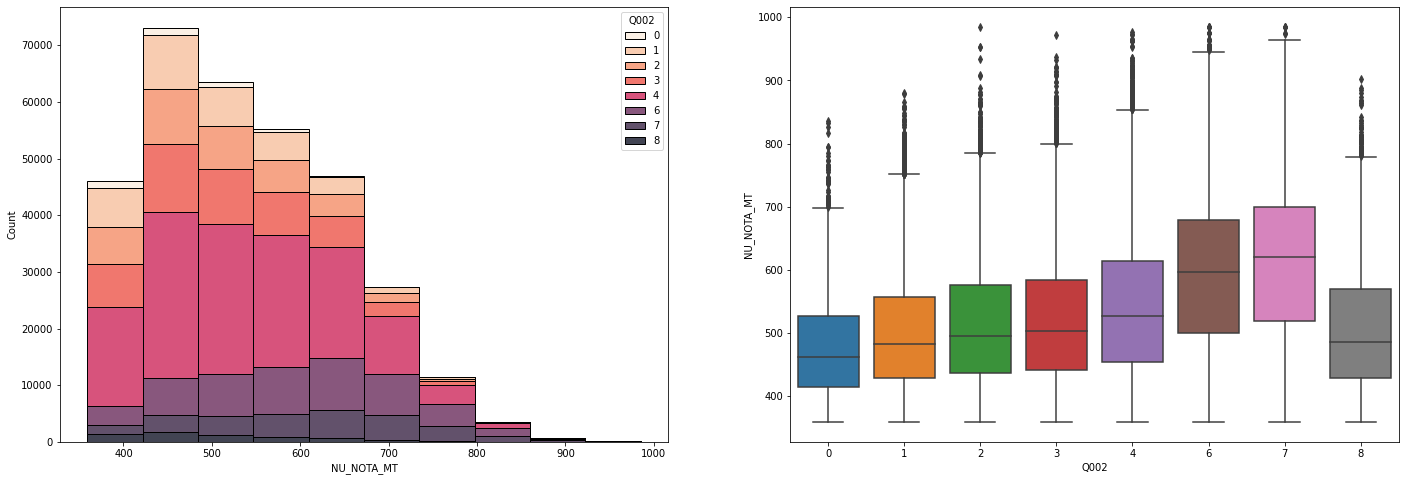

In [53]:
explore_nota_qse("NU_NOTA_MT", "Q002")

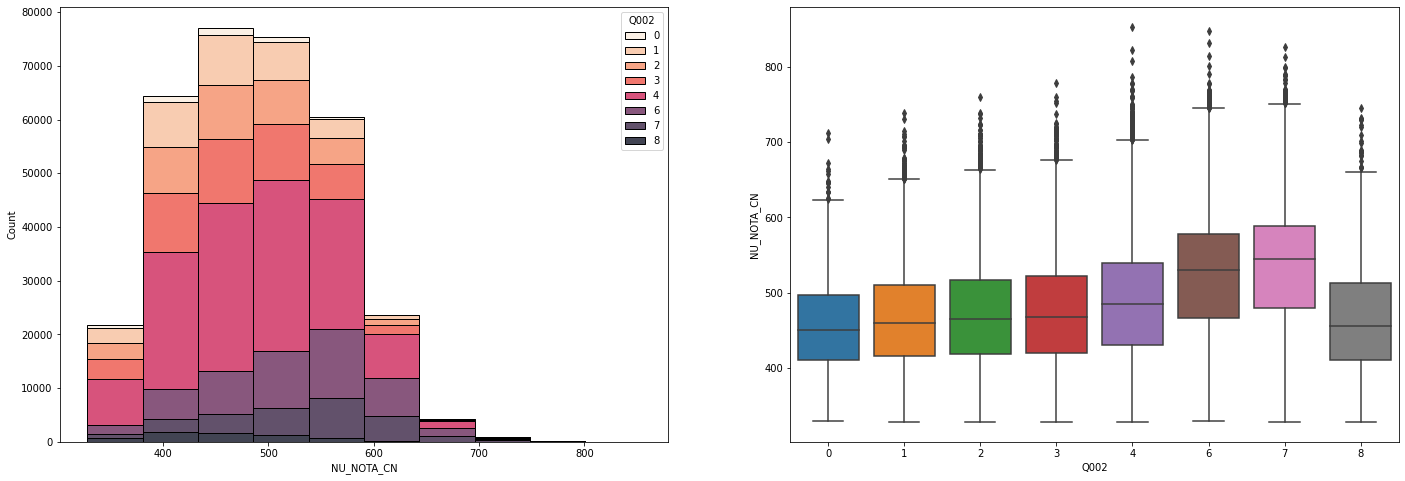

In [54]:
explore_nota_qse("NU_NOTA_CN", "Q002")

# Q006: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

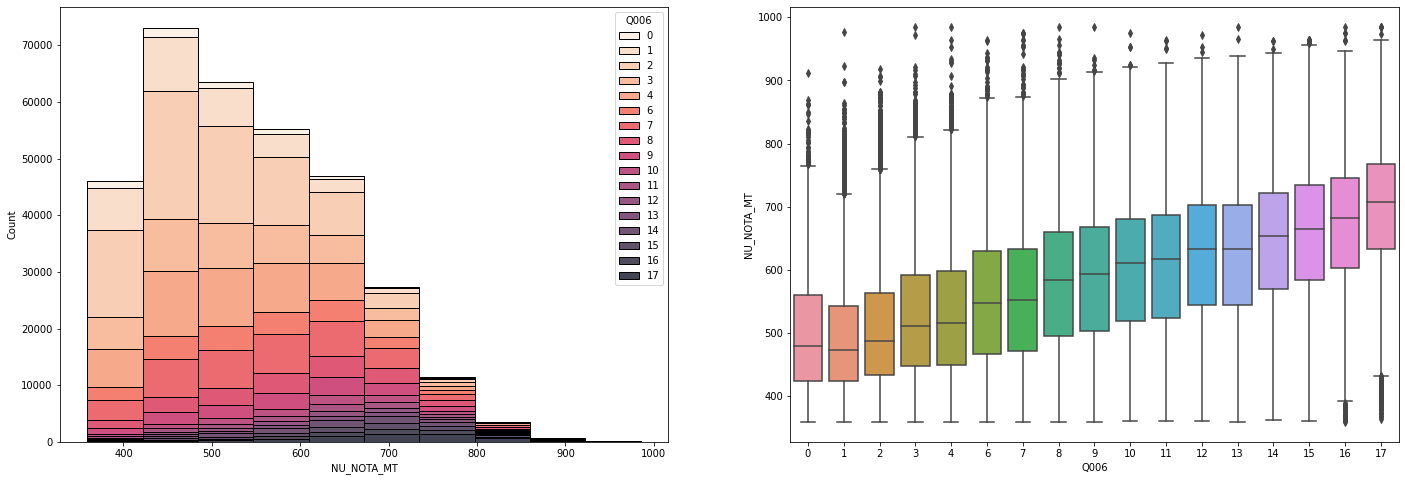

In [55]:
explore_nota_qse("NU_NOTA_MT", "Q006")

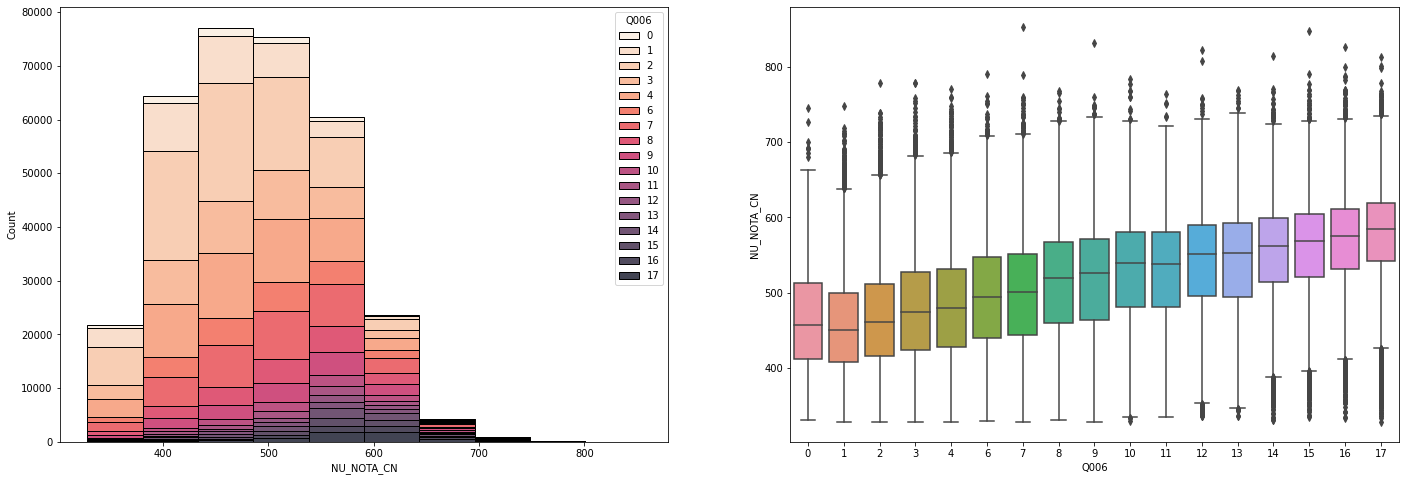

In [56]:
explore_nota_qse("NU_NOTA_CN", "Q006")

# Q005: Incluindo você, quantas pessoas moram atualmente em sua residência?

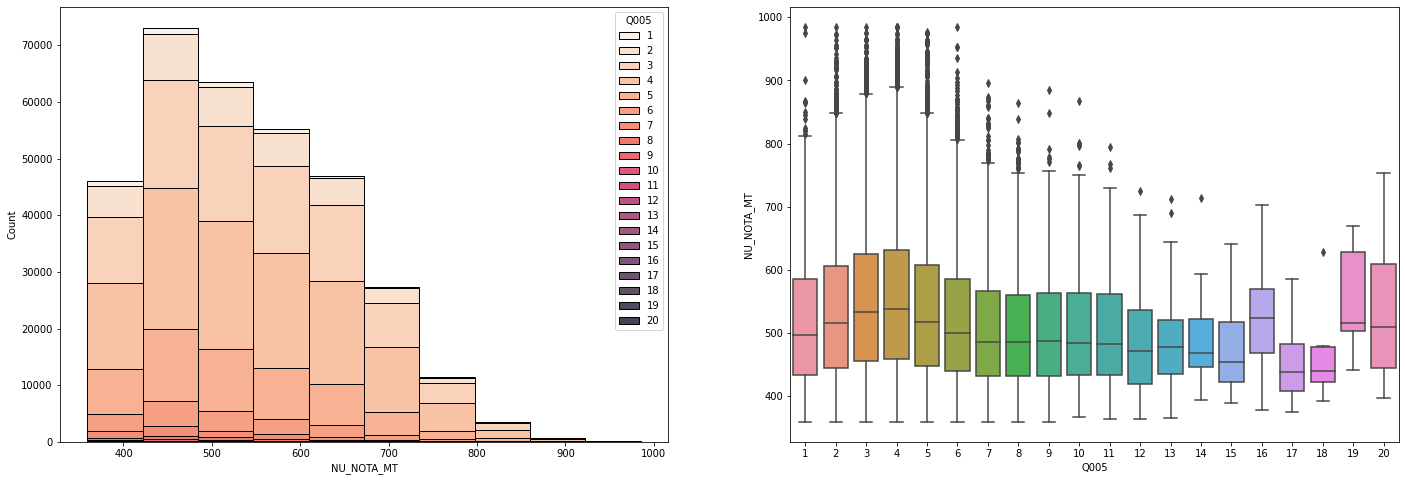

In [57]:
explore_nota_qse("NU_NOTA_MT", "Q005")

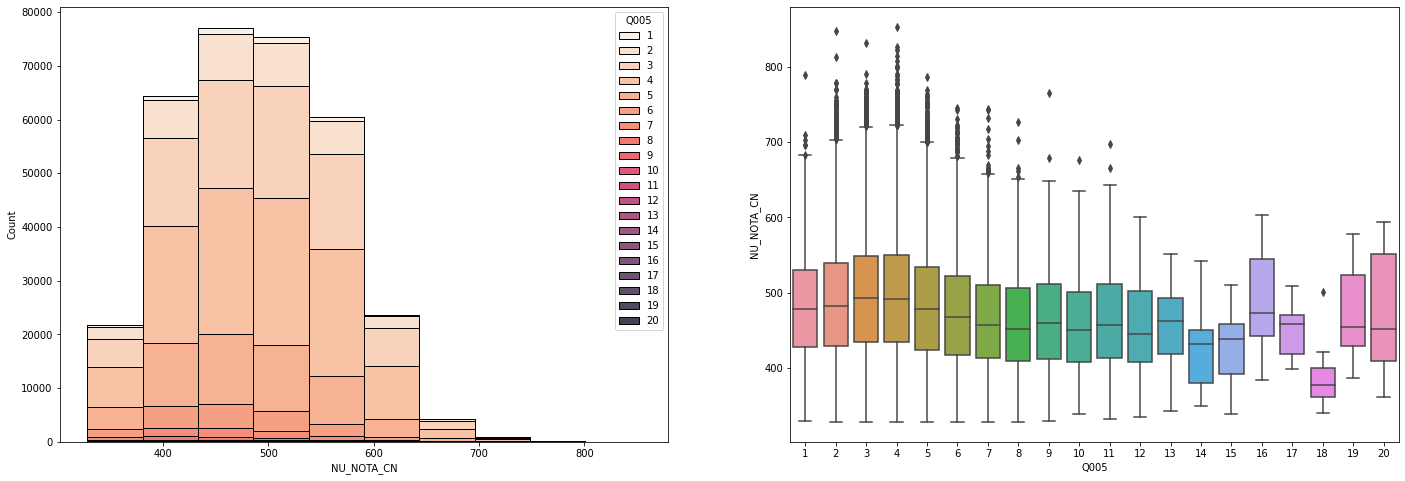

In [58]:
explore_nota_qse("NU_NOTA_CN", "Q005")